In [4]:
!pip show transformers

In [2]:

import keras
keras.__version__

'2.4.3'

In [3]:
import tensorflow as tf
tf.version.VERSION

'2.3.0'

In [ ]:
import os
import re
import pickle
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
# from keras.layers import Embedding
from  keras . utils  import  to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Permute
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df_train=pd.read_csv('gdrive/My Drive/Thesis Data/full doc csv/full_doc_train.csv')
df_test=pd.read_csv('gdrive/My Drive/Thesis Data/full doc csv/full_doc_test.csv')
total_data = pd.concat([df_train,df_test])
print(len(total_data))
total_data = total_data[(total_data['label']=='politics') | (total_data['label']=='sports') | (total_data['label']=='education')] # previously we erase these 3 labels of text,now we take these 3 labels of text
print(len(total_data))
# df.to_csv(news/'news_3less.csv',index=False) # convert the data to csv format

95855
44165


In [ ]:
set(total_data.label)

{'education', 'politics', 'sports'}

In [ ]:
!git clone -l -s https://github.com/banglakit/bengali-stemmer.git

Cloning into 'bengali-stemmer'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 94 (delta 5), reused 16 (delta 4), pack-reused 69
Unpacking objects: 100% (94/94), done.


In [ ]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git    

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-fqyz8snl
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-fqyz8snl
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=35baf19da6d16049ee467af4ee6327fb4e24d33c52d681df3a32ed2edba4891c
  Stored in directory: /tmp/pip-ephem-wheel-cache-haszttr6/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git    

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-d6qu00yv
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-d6qu00yv
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=83a99496a98fdef183df5399a1144e9e9beed9f888a9c2c3d5854f64a874eb46
  Stored in directory: /tmp/pip-ephem-wheel-cache-kylvnivd/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('বাংলায়')

'বাংলা'

In [ ]:
macronum=sorted(set(total_data['label']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

total_data['label']=total_data['label'].apply(fun)


In [ ]:
texts = list(total_data['text'])
labels = list(total_data['label'])


In [ ]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    return cleaned1

In [ ]:
stopwords = pd.read_csv('gdrive/My Drive/Colab Notebooks/Stopwords.csv')

In [ ]:
set_stop = set(stopwords['words'])

In [ ]:

def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if((cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
texts = pre_process(texts)

In [ ]:
texts[0]

'আদাল অতি উৎসাহী রিট আবেদন কারণ নারায়ণগঞ্জ সাত খুন মামল কার্যক্রম বাধাগ্রস্ত মন্তব্য প্রধানমন্ত্রী শেখ হাসিনা অতি উৎসাহী কর্মকাণ্ড কারণ অপরাধী সজাগ আইনশৃঙ্খলা রক্ষাকারী বাহিনীর ব্যাঘাত প্রধানমন্ত্রী যখন ব্যবস্থা তখন মানুষ অতি উৎসাহী কর্মকাণ্ড কার্যক্রম ব্যাহত কথা কথা রিট অর্ড কাজ নির্বাহী বিভাগ আইন শৃঙ্খলা বাহিনীর কথা; কাজ বিচ বিভাগ করণী হাত বেঁধ হয়েছে—এ পরিস্থিতির সৃষ্ গতকাল বুধব গণভবন আওয়ামী লীগ কার্যনির্বাহী সংস সূচনা বক্তব্য শেখ হাসিনা এসব কথা আইন বিচ নির্বাহী বিভাগ অপর পরিপূরক অতি উৎসাহী অসুবিধা হয়৷ অপর বাধা সৃষ্ সবাই বুঝ উৎসাহ নিজ প্রধানমন্ত্রী অনিয়ম ব্যবস্থা নিয়ে ভবিষ্য নেব আত্মী দেখ অন্যা বিচ নারায়ণগঞ্জ সাত খুন তদন্ত বিচ আশ্বাস প্রধানমন্ত্রী কখনো অন্যা প্রশ্র দেইনি ভবিষ্য দেব সাত খুন জড়িত কোথা থাক খঁুজ শাস্তি দেব৷ কখন কোন পন্থা হবে—আম ভালোভাব সাত খুন মামল প্রধান আসামি সিদ্ধিরগঞ্জ আওয়ামী লীগ সহসভাপতি নূর হোস প্রসঙ্গ শেখ হাসিনা সাত খুন শিক সবা আওয়ামী লীগ লোক আসামি বিএনপির সৃষ্টি৷ জাতী পার্ ছিলেন৷ লোক সরক পার্ ক্ষতিকারক৷ শিক্ষাপ্রতিষ্ঠান অনেক খাঁ কর্মী হাত কাট র্যাব বিলুপ্

In [ ]:
def load_data(num_words, sequence_length, test_size=0.25, oov_token=None):
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    num_classes = 3
    y = to_categorical(np.asarray(labels), num_classes)
    tokenizer.fit_on_texts(texts)
    X = tokenizer.texts_to_sequences(texts)
    X = np.array(X)
    # pad sequences with 0's
    X = pad_sequences(X, maxlen=sequence_length)
    # split data to training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    data = {}
    data["X_train"] = X_train
    data["X_test"]= X_test
    data["y_train"] = y_train
    data["y_test"] = y_test
    data["tokenizer"] = tokenizer
    return data

In [ ]:
d = set()
for s in texts:
    for ss in list(s.split()):
        d.add(ss)

In [ ]:
len(d)

185341

In [ ]:
max([len(s.split()) for s in texts]) # find the max length

5154

In [ ]:
MAX_SEQUENCE_LENGTH = 5154    #max([len(s.split()) for s in texts]) 
MAX_NUM_WORDS = 177340 + 1 # you have to use word same as tokenizer length, and add extra 1(for 0th index case)
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)

In [ ]:
len(data['tokenizer'].word_index) # after running previous cell of code we run this cell,we call the 'load_data' function before we see the len of data['tokenizer']

177340

In [ ]:
max_words = 177340 + 1
max_len = 5154 
# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(X_train)
# sequences = tok.texts_to_sequences(X_train)
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

LSTM only

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,300,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

    

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 5154)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 5154, 300)         53202300  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                

In [ ]:
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), batch_size=128, epochs=10, verbose=2)


Epoch 1/10
277/277 - 266s - loss: 0.2112 - accuracy: 0.8928 - val_loss: 0.1424 - val_accuracy: 0.9374
Epoch 2/10
277/277 - 267s - loss: 0.1174 - accuracy: 0.9395 - val_loss: 0.1204 - val_accuracy: 0.9391
Epoch 3/10
277/277 - 268s - loss: 0.0977 - accuracy: 0.9456 - val_loss: 0.1205 - val_accuracy: 0.9356
Epoch 4/10
277/277 - 268s - loss: 0.0866 - accuracy: 0.9521 - val_loss: 0.1253 - val_accuracy: 0.9300
Epoch 5/10
277/277 - 268s - loss: 0.0718 - accuracy: 0.9567 - val_loss: 0.1302 - val_accuracy: 0.9308
Epoch 6/10
277/277 - 268s - loss: 0.0642 - accuracy: 0.9592 - val_loss: 0.1427 - val_accuracy: 0.9211
Epoch 7/10
277/277 - 268s - loss: 0.0642 - accuracy: 0.9624 - val_loss: 0.3411 - val_accuracy: 0.8313
Epoch 8/10
277/277 - 268s - loss: 0.0585 - accuracy: 0.9644 - val_loss: 0.1577 - val_accuracy: 0.9212
Epoch 9/10
277/277 - 268s - loss: 0.0452 - accuracy: 0.9682 - val_loss: 0.1475 - val_accuracy: 0.9251
Epoch 10/10
277/277 - 269s - loss: 0.0417 - accuracy: 0.9683 - val_loss: 0.2381 - 

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


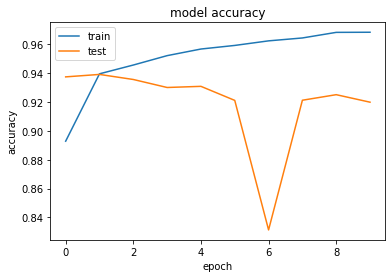

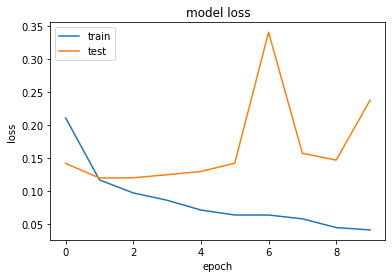

In [ ]:
history2(history)

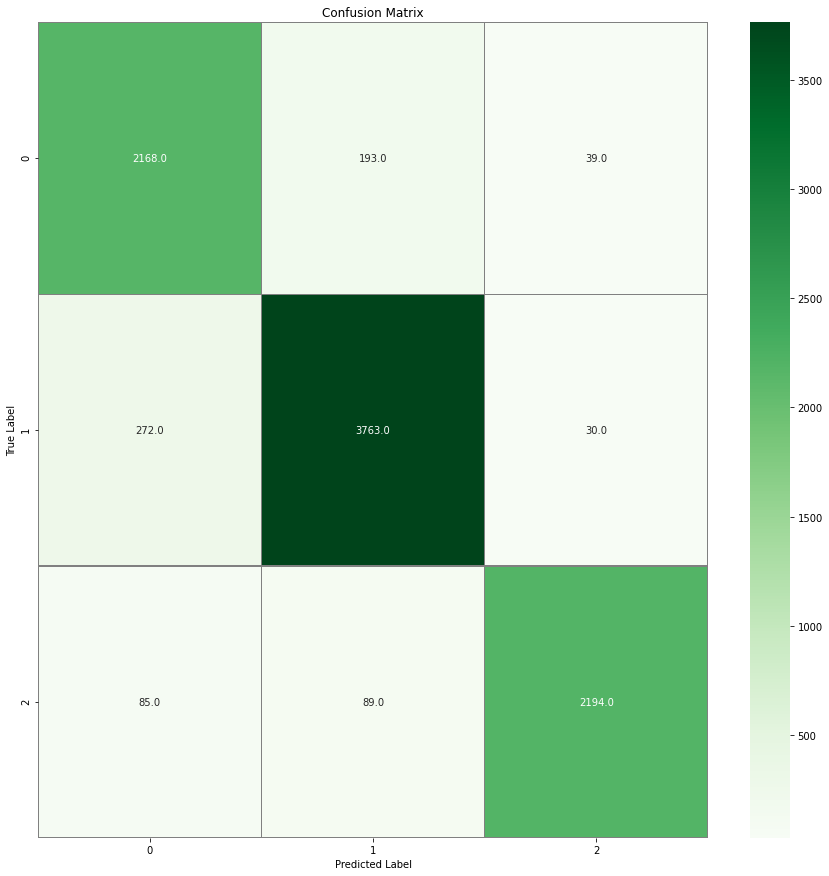

In [ ]:
confussion_mat(model)

LSTM with ATTENTION

In [ ]:
# this cell is no need for attention
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,300,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
SINGLE_ATTENTION_VECTOR = False
APPLY_ATTENTION_BEFORE_LSTM = False
def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Reshape((input_dim, TIME_STEPS))(a) # this line is not useful. It's just to know which dimension is what.
    a = Dense(TIME_STEPS, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    # output_attention_mul = merge([inputs, a_probs], name='attention_mul', mode='mul')
    output_attention_mul = multiply([inputs, a_probs])
    return output_attention_mul

In [ ]:
def model_attention_applied_after_lstm():
    #inputs = Input(shape=(TIME_STEPS, INPUT_DIM,))
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,300,input_length=max_len)(inputs)
    
    lstm_units = 128
    lstm_out = LSTM(lstm_units, return_sequences=True)(layer)
    attention_mul = attention_3d_block(lstm_out)
    attention_mul = Flatten()(attention_mul)
    output = Dense(3, activation='softmax')(attention_mul)
    model = Model(inputs=[inputs], outputs=output)
    return model

In [ ]:
from keras.layers import merge
from keras.layers import multiply
from keras.layers.core import *
from keras.layers.recurrent import LSTM
from keras.models import *

from keras.utils.vis_utils import plot_model

In [ ]:
INPUT_DIM = 300
TIME_STEPS = max_len

In [ ]:
m = model_attention_applied_after_lstm()


In [ ]:
m.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 5154)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 5154, 300)    53202300    inputs[0][0]                     
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 5154, 128)    219648      embedding[0][0]                  
__________________________________________________________________________________________________
permute (Permute)               (None, 128, 5154)    0           lstm[0][0]                       
_______________________________________________________________________________________

lstm units = 128, bs = 64

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = m.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), batch_size=64,callbacks=[callback], epochs=10, verbose=2)


Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
history2(history)

In [ ]:
confussion_mat(m)

lstm units = 128, bs=128

In [ ]:
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = m.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), batch_size=128, epochs=10, verbose=2)


Epoch 1/10
277/277 - 637s - loss: 0.5158 - accuracy: 0.5856 - val_loss: 0.2918 - val_accuracy: 0.8387
Epoch 2/10
277/277 - 632s - loss: 0.2187 - accuracy: 0.8834 - val_loss: 0.1860 - val_accuracy: 0.9071
Epoch 3/10
277/277 - 633s - loss: 0.1584 - accuracy: 0.9146 - val_loss: 0.3620 - val_accuracy: 0.7337
Epoch 4/10
277/277 - 627s - loss: 0.2097 - accuracy: 0.8797 - val_loss: 0.2368 - val_accuracy: 0.8671
Epoch 5/10
277/277 - 623s - loss: 0.1370 - accuracy: 0.9311 - val_loss: 0.2187 - val_accuracy: 0.8870
Epoch 6/10
277/277 - 622s - loss: 0.1257 - accuracy: 0.9336 - val_loss: 0.1411 - val_accuracy: 0.9235
Epoch 7/10
277/277 - 621s - loss: 0.0932 - accuracy: 0.9517 - val_loss: 0.1577 - val_accuracy: 0.9148
Epoch 8/10
277/277 - 621s - loss: 0.0929 - accuracy: 0.9497 - val_loss: 0.1532 - val_accuracy: 0.9171
Epoch 9/10
277/277 - 620s - loss: 0.0769 - accuracy: 0.9575 - val_loss: 0.1486 - val_accuracy: 0.9223
Epoch 10/10
277/277 - 620s - loss: 0.0616 - accuracy: 0.9624 - val_loss: 0.1429 - 

In [ ]:
accr = m.evaluate(data["X_test"],data["y_test"])
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

277/277 [==============================] - 48s 172ms/step - loss: 0.1429 - accuracy: 0.9228
Test set
  Loss: 0.143
  Accuracy: 0.923


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


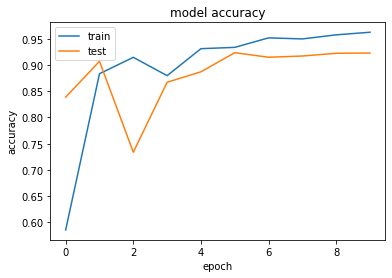

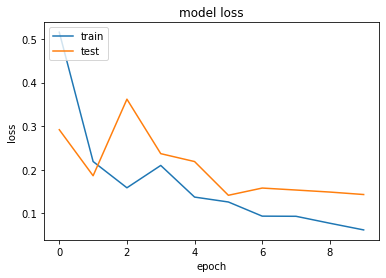

In [ ]:
history2(history)

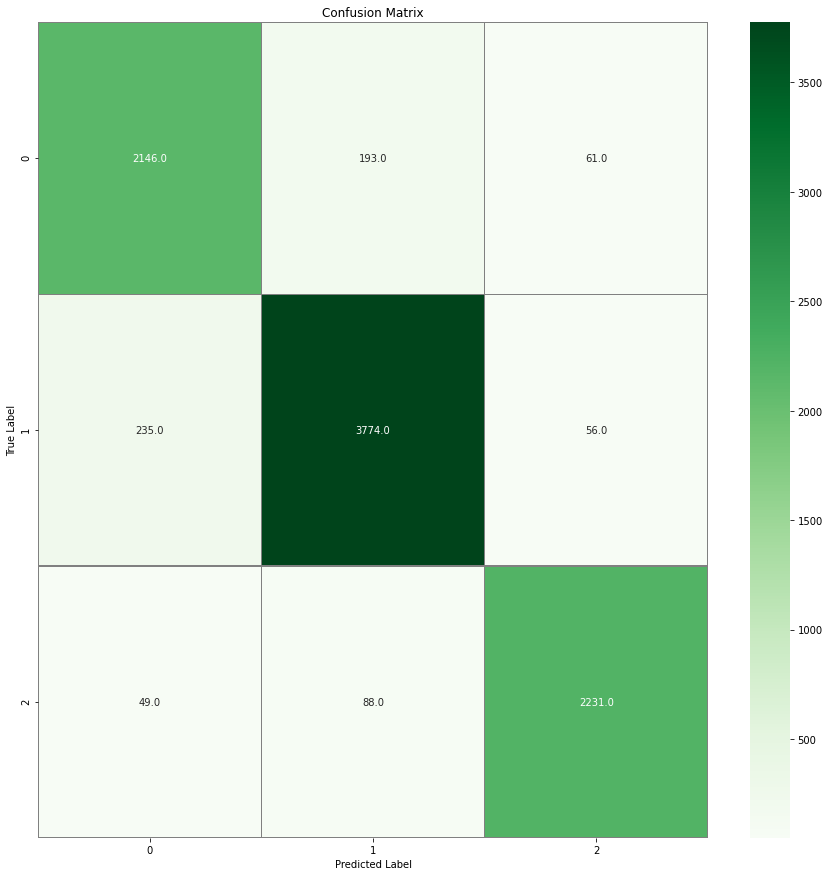

In [ ]:
confussion_mat(m)